In [2]:
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [26]:
import os

# Paths to the directories
dataset_dir = '..\images_dataset'
recreated_images_dir = '..\images_output_clip_100_200_old_model'

# Get the list of image file names in each directory
dataset_images = sorted(os.listdir(dataset_dir))
recreated_images = sorted(os.listdir(recreated_images_dir))

# Check if directories contain the same number of files
if len(dataset_images) != len(recreated_images):
    print("Warning: The directories do not contain the same number of images.")

# Full paths to the images
dataset_image_paths = [os.path.join(dataset_dir, img) for img in dataset_images]
recreated_image_paths = [os.path.join(recreated_images_dir, img) for img in recreated_images]

# Print the lists (optional)
print("Dataset Images:", dataset_image_paths)
print("Recreated Images:", recreated_image_paths)

Dataset Images: ['..\\images_dataset\\001.webp', '..\\images_dataset\\002.webp', '..\\images_dataset\\003.webp', '..\\images_dataset\\004.webp', '..\\images_dataset\\005.webp', '..\\images_dataset\\006.jpg', '..\\images_dataset\\007.webp', '..\\images_dataset\\008.webp', '..\\images_dataset\\009.webp', '..\\images_dataset\\010.webp', '..\\images_dataset\\011.webp', '..\\images_dataset\\012.webp', '..\\images_dataset\\013.webp', '..\\images_dataset\\014.webp', '..\\images_dataset\\015.webp', '..\\images_dataset\\016.jpg', '..\\images_dataset\\017.webp', '..\\images_dataset\\018.webp', '..\\images_dataset\\019.webp', '..\\images_dataset\\020.webp', '..\\images_dataset\\021.webp', '..\\images_dataset\\022.jpg', '..\\images_dataset\\023.webp', '..\\images_dataset\\024.jpg', '..\\images_dataset\\025.webp', '..\\images_dataset\\026.webp', '..\\images_dataset\\027.webp', '..\\images_dataset\\028.webp', '..\\images_dataset\\029.webp', '..\\images_dataset\\030.webp', '..\\images_dataset\\031.we

In [27]:
vgg16 = VGG16(weights='imagenet', include_top=False, pooling='max', input_shape=(224, 224, 3))

# Freezing the layers
for model_layer in vgg16.layers:
    model_layer.trainable = False

In [28]:
def load_and_preprocess_image(image_path):
    """
    Load and preprocess an image for the VGG16 model.
    """
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def get_image_embeddings(img_array):
    """
    Get image embeddings using the VGG16 model.
    """
    return vgg16.predict(img_array)

def get_similarity_score(first_image_path, second_image_path):
    """
    Compute the similarity score between two images.
    """
    first_image_array = load_and_preprocess_image(first_image_path)
    second_image_array = load_and_preprocess_image(second_image_path)
    first_image_embedding = get_image_embeddings(first_image_array)
    second_image_embedding = get_image_embeddings(second_image_array)
    return cosine_similarity(first_image_embedding, second_image_embedding)[0][0]

def draw_images(*image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(8, 8))
    for ax, image_path in zip(axes, image_paths):
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [29]:
similarity_scores = []

for i in range(150):
    similarity_scores.append(get_similarity_score(dataset_image_paths[i], recreated_image_paths[i]))

1/1 [==============================] - 0s 95ms/step


In [30]:
print("Minimum similarity score:", min(similarity_scores))
print("Maximum similarity score:", max(similarity_scores))
print("Mean similarity score:", sum(similarity_scores) / len(similarity_scores))

Minimum similarity score: 0.062528655
Maximum similarity score: 0.9041661
Mean similarity score: 0.7439487678805987


In [31]:
print(similarity_scores)

[0.7735027, 0.7876742, 0.7451463, 0.8350588, 0.80647475, 0.75861084, 0.7460953, 0.56653214, 0.7465991, 0.7780545, 0.73652506, 0.7141758, 0.7865917, 0.062528655, 0.7336143, 0.78228736, 0.7649275, 0.64066356, 0.50182915, 0.78718626, 0.61642754, 0.7732208, 0.80478084, 0.71727204, 0.6231607, 0.6498608, 0.7232755, 0.80175287, 0.79605514, 0.6784952, 0.84831715, 0.793524, 0.66864014, 0.67308193, 0.7301481, 0.8343626, 0.8161138, 0.78785163, 0.5643401, 0.7762048, 0.8443033, 0.7816021, 0.7743737, 0.69932497, 0.69314516, 0.8571281, 0.866942, 0.81099546, 0.6124293, 0.687318, 0.82052517, 0.88581365, 0.8853947, 0.8536737, 0.74734753, 0.8267648, 0.811364, 0.7634555, 0.7930019, 0.6563389, 0.567689, 0.768839, 0.80315197, 0.7385739, 0.7890024, 0.76231265, 0.69813937, 0.86044186, 0.7514187, 0.755505, 0.637931, 0.729663, 0.7448453, 0.85674703, 0.6609462, 0.86260986, 0.76451963, 0.6629099, 0.798105, 0.5644673, 0.7918459, 0.7885554, 0.74156404, 0.7849261, 0.41458344, 0.78763616, 0.7782109, 0.7341186, 0.7493

In [32]:
import json

# Load the JSON data from the file
file_path = '../compression/bandwidth_savings_static_canny.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the "bandwidth savings percentage" from each entry and store in a list
bandwidth_savings_percentages = [entry['bandwidth savings percentage'] for entry in data]

bandwidth_savings_percentages


[93.70664784236695,
 92.91830544388489,
 95.76431318055157,
 90.17715858273134,
 90.04265121795456,
 92.95715223302184,
 88.52951318140498,
 96.5512744075123,
 92.5085952760219,
 91.87401317580444,
 92.2790591612397,
 96.12229102167183,
 94.08798913619246,
 98.90593499045494,
 90.82660834150388,
 90.25737506572155,
 89.54795724795262,
 95.58568428740985,
 95.46469439017584,
 91.93348988519884,
 96.7986100619429,
 94.93936804567987,
 94.22467094788239,
 96.59834082886886,
 91.02520532427074,
 89.29971828000672,
 94.51579758540971,
 91.45291755528658,
 93.04731845139614,
 84.53882814690216,
 88.97228059641749,
 93.66014789234637,
 74.28847505270555,
 85.89996908477492,
 95.31385662325472,
 91.01883338724821,
 86.16953739746396,
 81.75263882514915,
 93.9858896409315,
 77.60727758566487,
 80.63037188324398,
 86.94774639458338,
 85.43602290583509,
 92.73086452822608,
 93.46987866567619,
 85.50382987653458,
 84.66680170143812,
 88.53668864557498,
 91.77665985954077,
 95.56785466097489,
 88.8

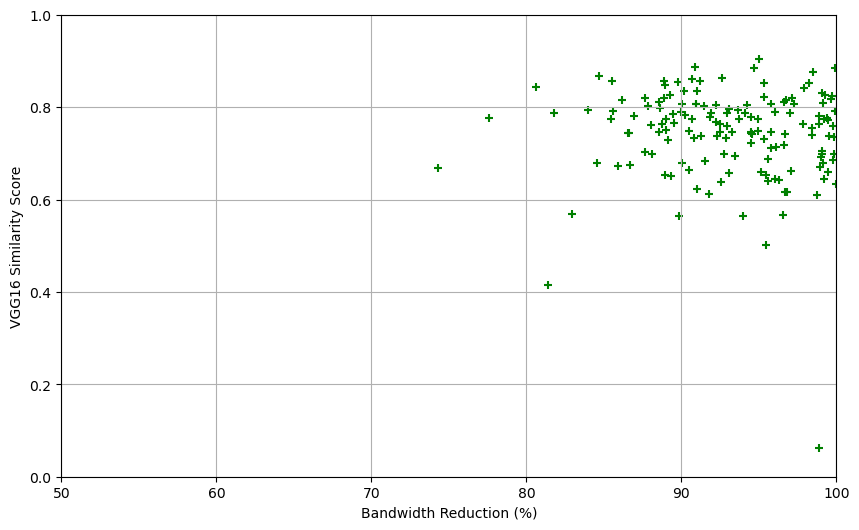

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Creating the scatterplot with crosses as markers and changing the color
plt.figure(figsize=(10, 6))
plt.scatter(bandwidth_savings_percentages, similarity_scores, alpha=1, marker='+', color='green')
plt.xlabel('Bandwidth Reduction (%)')
plt.ylabel('VGG16 Similarity Score')
plt.xlim(50, 100)
plt.ylim(0, 1)  # Set the limits of the x-axis from 0% to 100%
plt.grid(True)
plt.show()


In [54]:
gpt_recreated_images_dir = '..\images_output_gpt4_100_200_new_model'


gpt_recreated_images = sorted(os.listdir(gpt_recreated_images_dir))

# Check if directories contain the same number of files
if len(dataset_images) != len(gpt_recreated_images):
    print("Warning: The directories do not contain the same number of images.")

# Full paths to the images
gpt_recreated_image_paths = [os.path.join(gpt_recreated_images_dir, img) for img in gpt_recreated_images]

# Print the lists (optional)
print("Dataset Images:", dataset_image_paths)
print("GPT Recreated Images:", gpt_recreated_image_paths)

Dataset Images: ['..\\images_dataset\\001.webp', '..\\images_dataset\\002.webp', '..\\images_dataset\\003.webp', '..\\images_dataset\\004.webp', '..\\images_dataset\\005.webp', '..\\images_dataset\\006.jpg', '..\\images_dataset\\007.webp', '..\\images_dataset\\008.webp', '..\\images_dataset\\009.webp', '..\\images_dataset\\010.webp', '..\\images_dataset\\011.webp', '..\\images_dataset\\012.webp', '..\\images_dataset\\013.webp', '..\\images_dataset\\014.webp', '..\\images_dataset\\015.webp', '..\\images_dataset\\016.jpg', '..\\images_dataset\\017.webp', '..\\images_dataset\\018.webp', '..\\images_dataset\\019.webp', '..\\images_dataset\\020.webp', '..\\images_dataset\\021.webp', '..\\images_dataset\\022.jpg', '..\\images_dataset\\023.webp', '..\\images_dataset\\024.jpg', '..\\images_dataset\\025.webp', '..\\images_dataset\\026.webp', '..\\images_dataset\\027.webp', '..\\images_dataset\\028.webp', '..\\images_dataset\\029.webp', '..\\images_dataset\\030.webp', '..\\images_dataset\\031.we

In [58]:
dataset_image_paths_12_removed = dataset_image_paths[:12-1] + dataset_image_paths[12:]
print(dataset_image_paths_12_removed)

print(len(dataset_image_paths_12_removed))
print(len(gpt_recreated_image_paths))

['..\\images_dataset\\001.webp', '..\\images_dataset\\002.webp', '..\\images_dataset\\003.webp', '..\\images_dataset\\004.webp', '..\\images_dataset\\005.webp', '..\\images_dataset\\006.jpg', '..\\images_dataset\\007.webp', '..\\images_dataset\\008.webp', '..\\images_dataset\\009.webp', '..\\images_dataset\\010.webp', '..\\images_dataset\\011.webp', '..\\images_dataset\\013.webp', '..\\images_dataset\\014.webp', '..\\images_dataset\\015.webp', '..\\images_dataset\\016.jpg', '..\\images_dataset\\017.webp', '..\\images_dataset\\018.webp', '..\\images_dataset\\019.webp', '..\\images_dataset\\020.webp', '..\\images_dataset\\021.webp', '..\\images_dataset\\022.jpg', '..\\images_dataset\\023.webp', '..\\images_dataset\\024.jpg', '..\\images_dataset\\025.webp', '..\\images_dataset\\026.webp', '..\\images_dataset\\027.webp', '..\\images_dataset\\028.webp', '..\\images_dataset\\029.webp', '..\\images_dataset\\030.webp', '..\\images_dataset\\031.webp', '..\\images_dataset\\032.webp', '..\\images

In [59]:
gpt_similarity_scores = []

for i in range(150):
    gpt_similarity_scores.append(get_similarity_score(dataset_image_paths_12_removed[i], gpt_recreated_image_paths[i]))

1/1 [==============================] - 0s 86ms/step


IndexError: list index out of range

In [60]:
print("Minimum similarity score:", min(gpt_similarity_scores))
print("Maximum similarity score:", max(gpt_similarity_scores))
print("Mean similarity score:", sum(gpt_similarity_scores) / len(gpt_similarity_scores))

Minimum similarity score: 0.32725674
Maximum similarity score: 0.9004845
Mean similarity score: 0.7529404163360596


In [63]:
bandwidth_savings_percentages_12_removed = bandwidth_savings_percentages[:12-1] + bandwidth_savings_percentages[12:]

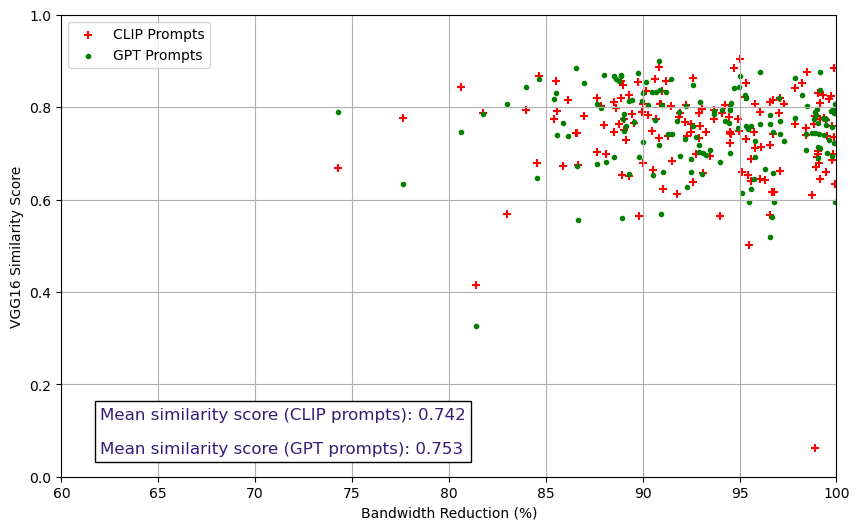

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Creating the scatterplot
plt.figure(figsize=(10, 6))
# Plotting the first set of similarity scores
plt.scatter(bandwidth_savings_percentages, similarity_scores, alpha=1, marker='+', color='red', label='CLIP Prompts')
# Plotting the second set of similarity scores
plt.scatter(bandwidth_savings_percentages_12_removed, gpt_similarity_scores, alpha=1, marker='.', color='green', label='GPT Prompts')
plt.xlabel('Bandwidth Reduction (%)')
plt.ylabel('VGG16 Similarity Score')
plt.xlim(60, 100)  # Set the x-axis limits from 50% to 100%
plt.ylim(0, 1)    # Set the y-axis limits from 0 to 1
plt.grid(True)
plt.legend()  # Add a legend to differentiate the data sets

plt.text(0.05, 0.05, f'{"Mean similarity score (CLIP prompts): 0.742"}\n\n{"Mean similarity score (GPT prompts): 0.753"}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=1), color='#351c75')

plt.show()
